In [352]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import json

consumer_key=""
consumer_secret=""
access_token=""
access_token_secret=""


class StdOutListener(StreamListener):
        
        #This function gets called every time a new tweet is received on the stream
    def on_data(self, data):
          
          fhOut.write(data)
                
                #Convert the data to a json object (shouldn't do this in production; might slow down and miss tweets)
          j=json.loads(data)

                
          text=j["text"] #The text of the tweet
          print(text) #Print it out
           

    def on_error(self, status):
        print("ERROR")
        print(status)

if __name__ == '__main__':
        try:
                #Create a file to store output. "a" means append (add on to previous file)
                fhOut = open("output.json","a")

                #Create the listener
                l = StdOutListener()
                auth = OAuthHandler(consumer_key, consumer_secret)
                auth.set_access_token(access_token, access_token_secret)

                #Connect to the Twitter stream
                stream = Stream(auth, l)        

                #Terms to track
                stream.filter(track=["india"], languages=["en"])
                
                #Alternatively, location box  for geotagged tweets
                #stream.filter(locations=[-0.530, 51.322, 0.231, 51.707])

        except KeyboardInterrupt:
                #User pressed ctrl+c -- get ready to exit the program
                pass

        #Close the 
        fhOut.close()


RT @Bikash_Das_11: Damn &amp; yes ! 
We are Trending on the 17th Position In India ! 
Guys keep on tweeting &amp; most importantly retweeting ....…
RT @Haggis_UK: Yvette Cooper - Hong Kong identified 47 covid cases on a single flight from Delhi, &amp; we have 16 more direct flights &amp; many m…
RT @digvijaya_28: "States Must Keep Oxygen Demand Under Control": Union Minister Piyush Goyal

How stupid Piyush ji!! Oxygen demand is need…
RT @rssurjewala: The entire nation wishes you a speedy recovery Dr. Manmohan Singh ji.

India needs the sagacious vision, self imposed rest…
WTFFFFF!! And you know what the first ones to import this shit from America to India would be the liberal hindus
RT @ANI: Govt of India announces liberalised &amp; accelerated Phase 3 strategy of COVID-19 vaccination from May 1; everyone above the age of 1…
@TraderMindset @stockswala You wont find a responsible government anywhere in India , be it center or state , be it… https://t.co/8JBeAjzVYx
RT @Chaital71870857: @

ProtocolError: ignored

In [1]:
import json
tweets = []
for line in open('output (4).json', 'r'):
    tweets.append(json.loads(line)["text"])
#print(tweets[:10])

type(tweets[2])
tweets[9]

len(tweets)

3282

In [2]:
import pandas as pd

df = pd.DataFrame(tweets, columns=['Tweets'])
df.head(1000)
#data_text = df.Tweets

,Tweets
0,RT @Joydas: When Is the Last Election Rally of...
1,RT @abir_1729: #cancelboardexam2021\n#cancelbo...
2,RT @LiveLawIndia: Can Centre Intervene If A St...
3,RT @soompi: #GOT7's #BamBam Pauses Activities ...
4,RT @NagpurKaRajini: So Covid in Maharashtra sp...
...,...
995,Maha-Kumbh Mela Vs Tablighi Jamaat: Not Compar...
996,RT @Pritam68450622: #postponeneetpg \nCbse iaf...
997,Where are thier keeping Negative Covid-19 repo...
998,RT @dinesh_sir: Thanks for taking decisions fo...


In [3]:
data_text = df.Tweets.tolist()

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
#tweets['new'] = tweets.apply(lambda x: re.sub(r"http\S+", "", x))
from nltk.stem.porter import *
import nltk
import numpy as np
df['new'] = df['Tweets'].apply(lambda x: re.sub(r"http\S+", "", x))


#  Removing Twitter Handles (@user)
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    



# remove twitter handles (@user)
df['tidy_text'] = np.vectorize(remove_pattern)(df['new'], "@[\w]*")



# remove special characters, numbers, punctuations
df['tidy_text'] = df['tidy_text'].str.replace("[^a-zA-Z#]", " ")

 # Removing Short Words     
df['tidy_text'] = df['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))



# Tokenization
tweets = df.values.tolist()
df['tok'] = df['tidy_text'].apply(lambda x: nltk.word_tokenize(x))


noun = []   
#for  index, row in tweets.iterrows():
for pos, row in df.iterrows():
    noun.append([word for word,pos in nltk.pos_tag(row['tok']) if pos == 'NN' or pos =='NNP' or pos == 'NNS' or pos == 'NNPS'])
    
    
df['nouns'] = noun





tokenized_tweet = df['nouns']



# Stemming

stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 



docs = tokenized_tweet.tolist()

vocab = set( x for doc in docs for x in doc)
n_terms = len(vocab)



In [7]:
df.Tweets.unique().shape


(2114,)

In [8]:
df['is_retweet'] = df['Tweets'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

df.loc[df['is_retweet']].Tweets.unique().size

df.groupby(['Tweets']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)


,Tweets,counts
1249,RT @SonuSood: C: Cancel \nB: Board’s \nS: ...,255
1322,"RT @TrendPSPK: Friends,\n\nEMERGENCY REQUIREME...",38
1696,RT @nidhiindiatv: Delhi CM @ArvindKejriwal req...,34
1883,RT @trolllikebroo: Delhi CM comes out in suppo...,19
789,"RT @DipshikhaGhosh: Please, please wear masks....",19
1499,RT @dinesh_sir: Thanks for taking decisions fo...,19
1598,RT @johnfraher: 💉Vaccine Tracker Update-April ...,16
1025,"RT @MahuaMoitra: At Kumbh, Covid guard slips: ...",15
1622,RT @latokens: Cities for the post-COVID future...,15
1580,RT @imchandanRay: Gov’t should be held respons...,14


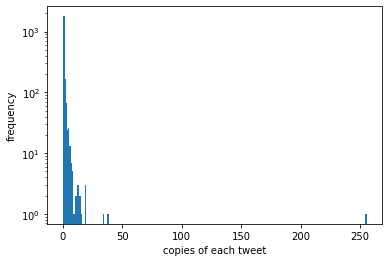

In [9]:
import numpy as np
import matplotlib.pyplot as plt
counts = df.groupby(['Tweets']).size()\
           .reset_index(name='counts')\
           .counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [10]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)


In [13]:
df['retweeted'] = df.Tweets.apply(find_retweeted)
df['mentioned'] = df.Tweets.apply(find_mentioned)
df['hashtags'] = df.Tweets.apply(find_hashtags)

In [14]:
df[:10]


,Tweets,new,tidy_text,tok,nouns,is_retweet,retweeted,mentioned,hashtags
0,RT @Joydas: When Is the Last Election Rally of...,RT @Joydas: When Is the Last Election Rally of...,When Last Election Rally Narendra Modi West Be...,"[When, Last, Election, Rally, Narendra, Modi, ...","[Election, Rally, Narendra, Modi, West, Bengal...",True,[@Joydas],[],[]
1,RT @abir_1729: #cancelboardexam2021\n#cancelbo...,RT @abir_1729: #cancelboardexam2021\n#cancelbo...,#cancelboardexam #cancelboardexams students co...,"[#, cancelboardexam, #, cancelboardexams, stud...","[cancelboardexam, students, exam, dates]",True,[@abir_1729],[],"[#cancelboardexam2021, #cancelboardexams2021]"
2,RT @LiveLawIndia: Can Centre Intervene If A St...,RT @LiveLawIndia: Can Centre Intervene If A St...,Centre Intervene State Doing Well High Court A...,"[Centre, Intervene, State, Doing, Well, High, ...","[Centre, Intervene, State, Doing, Well, High, ...",True,[@LiveLawIndia],[],[]
3,RT @soompi: #GOT7's #BamBam Pauses Activities ...,RT @soompi: #GOT7's #BamBam Pauses Activities ...,#GOT #BamBam Pauses Activities After Staff Mem...,"[#, GOT, #, BamBam, Pauses, Activities, After,...","[GOT, BamBam, Pauses, Activities, Staff, Membe...",True,[@soompi],[],"[#GOT7, #BamBam]"
4,RT @NagpurKaRajini: So Covid in Maharashtra sp...,RT @NagpurKaRajini: So Covid in Maharashtra sp...,Covid Maharashtra spread because Modi rally We...,"[Covid, Maharashtra, spread, because, Modi, ra...","[Covid, Maharashtra, spread, Modi, West, Benga...",True,[@NagpurKaRajini],[],[]
5,UK economy returns to growth despite Covid res...,UK economy returns to growth despite Covid res...,economy returns growth despite Covid restrictions,"[economy, returns, growth, despite, Covid, res...","[economy, growth, Covid, restrictions]",False,[],[],[]
6,RT @PGaspirant7: #postponeneetpg \n@profplal\n...,RT @PGaspirant7: #postponeneetpg \n@profplal\n...,#postponeneetpg Covid stay here long Surge wil...,"[#, postponeneetpg, Covid, stay, here, long, S...","[postponeneetpg, Covid, stay, Surge, wait, Surge]",True,[@PGaspirant7],[@profplal],[#postponeneetpg]
7,RT @dinesh_sir: Thanks for taking decisions fo...,RT @dinesh_sir: Thanks for taking decisions fo...,Thanks taking decisions safety students please...,"[Thanks, taking, decisions, safety, students, ...","[Thanks, decisions, safety, students, picture,...",True,[@dinesh_sir],[],[]
8,RT @Nher_who: Now that India is facing Second ...,RT @Nher_who: Now that India is facing Second ...,that India facing Second COVID wave Lets Hope ...,"[that, India, facing, Second, COVID, wave, Let...","[India, Second, COVID, Lets, Hope, funds, name...",True,[@Nher_who],[],[]
9,RT @abcnews: Thousands of vulnerable Australia...,RT @abcnews: Thousands of vulnerable Australia...,Thousands vulnerable Australians anxiously wai...,"[Thousands, vulnerable, Australians, anxiously...","[Thousands, Australians, COVID, vaccine]",True,[@abcnews],[],[]


In [16]:
hashtags_list_df = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])


In [17]:
flattened_hashtags_df[:10]


,hashtag
0,#cancelboardexam2021
1,#cancelboardexams2021
2,#GOT7
3,#BamBam
4,#postponeneetpg
5,#Zimbabwe
6,#Africa
7,#cancelboardexam2021
8,#CongratulationsHaji
9,#cancelboardexams2021


In [18]:
flattened_hashtags_df['hashtag'].unique().size

449

In [19]:
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)


In [20]:
popular_hashtags[:10]


,hashtag,counts
0,#cancelboardexams2021,56
1,#cancelcbseboardexams2021,34
2,#COVID19,33
3,#COVID,20
4,#cancelboardexam2021,17
5,#India,14
6,#Covid,13
7,#CBSE,13
8,#KumbhMela2021,13
9,#SIDEBYSIDE_NEXT_TO_THE8,12


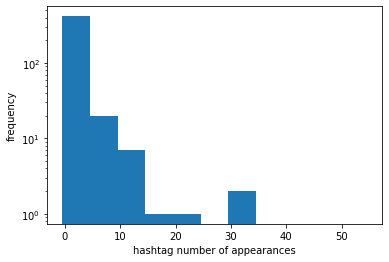

In [21]:
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()


In [22]:
min_appearance = 10
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]

hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)


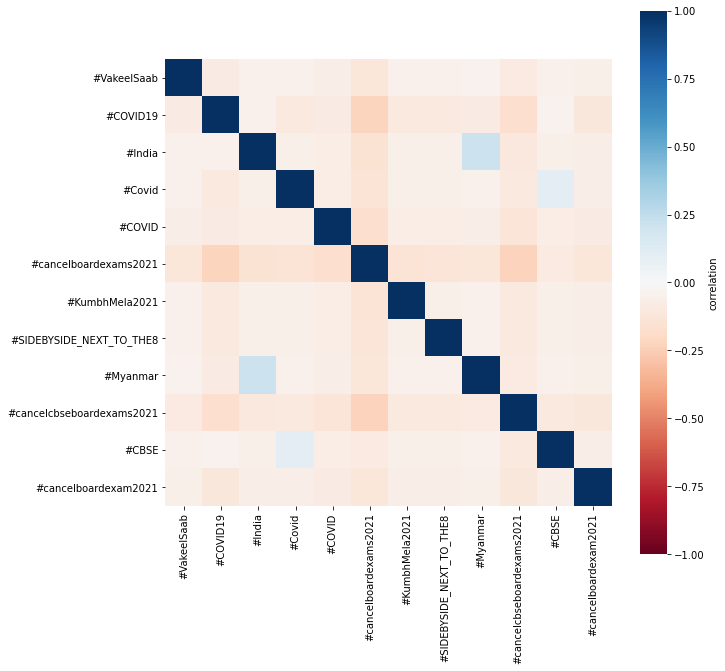

In [23]:
import seaborn as sns

correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

In [24]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_links(tweet):

    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

nltk.download('stopwords')

df['clean_tweet'] = df.Tweets.apply(clean_tweet)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# Using Latent Dirichlet Mixture model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

model.fit(tf)

LatentDirichletAllocation(random_state=0)

In [26]:

def display_topics(model, feature_names, no_top_words):

    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)


In [27]:
no_top_words = 10

p = display_topics(model, tf_feature_names, no_top_words)

#df['clean_tweet'][0].split(" ")

In [28]:
p

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,exam,712.2,…,165.8,…,310.2,…,243.8,…,186.8,call,106.1,…,234.4,…,181.7,covid,398.7,…,299.6
1,board,358.1,lakh,86.1,india,247.0,covid,158.5,take,73.0,friend,97.1,covid,179.0,covid,127.5,…,261.9,covid,227.0
2,centr,356.6,delhi,74.1,amp,144.7,’,130.6,vaccin,66.7,pleas,94.3,india,78.4,posit,96.2,vaccin,214.3,us,107.6
3,cancel,352.1,world,69.1,time,62.2,test,85.5,thank,63.5,…,89.9,case,71.8,peopl,92.2,case,82.7,year,100.5
4,becom,345.1,student,68.4,like,62.1,’t,85.1,india,53.9,covid,87.0,need,64.8,good,79.8,death,80.1,vaccin,87.9
5,…,318.9,come,58.4,peopl,60.3,one,64.7,covid,52.3,place,83.1,hospit,61.1,test,74.0,new,61.3,book,74.8
6,let,315.8,india,51.4,th,54.0,live,64.1,say,49.0,emerg,74.1,second,50.5,request,65.1,get,59.4,last,70.2
7,covid,311.1,cbse,50.2,would,38.1,india,58.4,tri,45.1,blood,72.1,pm,47.1,mask,64.1,#covid,54.2,due,51.7
8,student,310.0,exam,50.2,also,33.1,first,55.4,post,43.1,requir,70.1,trend,42.1,pleas,58.6,uk,50.7,peopl,47.7
9,’,294.2,minist,46.9,i,32.4,news,53.3,futur,41.9,trust,67.1,#cancelboardexams,42.1,know,58.0,emerg,50.1,age,44.6


In [29]:
# Using Extension to LDA model
from numpy import log, exp
from numpy import argmax
import json
from numpy.random import multinomial

class MovieGroupProcess:
    def __init__(self, K=8, alpha=0.1, beta=0.1, n_iters=30):
        '''
        A MovieGroupProcess is a conceptual model introduced by Yin and Wang 2014 to
        describe their Gibbs sampling algorithm for a Dirichlet Mixture Model for the
        clustering short text documents.
        Reference: http://dbgroup.cs.tsinghua.edu.cn/wangjy/papers/KDD14-GSDMM.pdf
        Imagine a professor is leading a film class. At the start of the class, the students
        are randomly assigned to K tables. Before class begins, the students make lists of
        their favorite films. The teacher reads the role n_iters times. When
        a student is called, the student must select a new table satisfying either:
            1) The new table has more students than the current table.
        OR
            2) The new table has students with similar lists of favorite movies.
        :param K: int
            Upper bound on the number of possible clusters. Typically many fewer
        :param alpha: float between 0 and 1
            Alpha controls the probability that a student will join a table that is currently empty
            When alpha is 0, no one will join an empty table.
        :param beta: float between 0 and 1
            Beta controls the student's affinity for other students with similar interests. A low beta means
            that students desire to sit with students of similar interests. A high beta means they are less
            concerned with affinity and are more influenced by the popularity of a table
        :param n_iters:
        '''
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.n_iters = n_iters

        # slots for computed variables
        self.number_docs = None
        self.vocab_size = None
        self.cluster_doc_count = [0 for _ in range(K)]
        self.cluster_word_count = [0 for _ in range(K)]
        self.cluster_word_distribution = [{} for i in range(K)]
    @staticmethod
    def from_data(K, alpha, beta, D, vocab_size, cluster_doc_count, cluster_word_count, cluster_word_distribution):
        '''
        Reconstitute a MovieGroupProcess from previously fit data
        :param K:
        :param alpha:
        :param beta:
        :param D:
        :param vocab_size:
        :param cluster_doc_count:
        :param cluster_word_count:
        :param cluster_word_distribution:
        :return:
        '''
        mgp = MovieGroupProcess(K, alpha, beta, n_iters=30)
        mgp.number_docs = D
        mgp.vocab_size = vocab_size
        mgp.cluster_doc_count = cluster_doc_count
        mgp.cluster_word_count = cluster_word_count
        mgp.cluster_word_distribution = cluster_word_distribution
        return mgp

    @staticmethod
    def _sample(p):
        '''
        Sample with probability vector p from a multinomial distribution
        :param p: list
            List of probabilities representing probability vector for the multinomial distribution
        :return: int
            index of randomly selected output
        '''
        return [i for i, entry in enumerate(multinomial(1, p)) if entry != 0][0]
    def fit(self, docs, vocab_size):
        '''
        Cluster the input documents
        :param docs: list of list
            list of lists containing the unique token set of each document
        :param V: total vocabulary size for each document
        :return: list of length len(doc)
            cluster label for each document
        '''
        alpha, beta, K, n_iters, V = self.alpha, self.beta, self.K, self.n_iters, vocab_size

        D = len(docs)
        self.number_docs = D
        self.vocab_size = vocab_size

        # unpack to easy var names
        m_z, n_z, n_z_w = self.cluster_doc_count, self.cluster_word_count, self.cluster_word_distribution
        cluster_count = K
        d_z = [None for i in range(len(docs))]

        # initialize the clusters
        for i, doc in enumerate(docs):

            # choose a random  initial cluster for the doc
            z = self._sample([1.0 / K for _ in range(K)])
            d_z[i] = z
            m_z[z] += 1
            n_z[z] += len(doc)
           
            for word in doc:
                if word not in n_z_w[z]:
                    n_z_w[z][word] = 0
                n_z_w[z][word] += 1

        for _iter in range(n_iters):
            total_transfers = 0
            for i, doc in enumerate(docs):

                # remove the doc from it's current cluster
                z_old = d_z[i]

                m_z[z_old] -= 1
                n_z[z_old] -= len(doc)

                for word in doc:
                    n_z_w[z_old][word] -= 1

                    # compact dictionary to save space
                    if n_z_w[z_old][word] == 0:
                        del n_z_w[z_old][word]

                # draw sample from distribution to find new cluster
                p = self.score(doc)
                z_new = self._sample(p)

                # transfer doc to the new cluster
                if z_new != z_old:
                    total_transfers += 1

                d_z[i] = z_new
                m_z[z_new] += 1
                n_z[z_new] += len(doc)

                for word in doc:
                    if word not in n_z_w[z_new]:
                        n_z_w[z_new][word] = 0
                    n_z_w[z_new][word] += 1

            cluster_count_new = sum([1 for v in m_z if v > 0])
            print("In stage %d: transferred %d clusters with %d clusters populated" % (
            _iter, total_transfers, cluster_count_new))
            if total_transfers == 0 and cluster_count_new == cluster_count and _iter>25:
                print("Converged.  Breaking out.")
                break
            cluster_count = cluster_count_new
        self.cluster_word_distribution = n_z_w
        return d_z

    def score(self, doc):
        '''
        Score a document
        Implements formula (3) of Yin and Wang 2014.
        http://dbgroup.cs.tsinghua.edu.cn/wangjy/papers/KDD14-GSDMM.pdf
        :param doc: list[str]: The doc token stream
        :return: list[float]: A length K probability vector where each component represents
                              the probability of the document appearing in a particular cluster
        '''
        alpha, beta, K, V, D = self.alpha, self.beta, self.K, self.vocab_size, self.number_docs
        m_z, n_z, n_z_w = self.cluster_doc_count, self.cluster_word_count, self.cluster_word_distribution

        p = [0 for _ in range(K)]

        #  We break the formula into the following pieces
        #  p = N1*N2/(D1*D2) = exp(lN1 - lD1 + lN2 - lD2)
        #  lN1 = log(m_z[z] + alpha)
        #  lN2 = log(D - 1 + K*alpha)
        #  lN2 = log(product(n_z_w[w] + beta)) = sum(log(n_z_w[w] + beta))
        #  lD2 = log(product(n_z[d] + V*beta + i -1)) = sum(log(n_z[d] + V*beta + i -1))

        lD1 = log(D - 1 + K * alpha)
        doc_size = len(doc)
        for label in range(K):
            lN1 = log(m_z[label] + alpha)
            lN2 = 0
            lD2 = 0
            for word in doc:
                lN2 += log(n_z_w[label].get(word, 0) + beta)
                for j in range(1, doc_size +1):
                  lD2 += log(n_z[label] + V * beta + j - 1)
            p[label] = exp(lN1 - lD1 + lN2 - lD2)

        # normalize the probability vector
        pnorm = sum(p)
        pnorm = pnorm if pnorm>0 else 1
        return [pp/pnorm for pp in p]

    def choose_best_label(self, doc):
        '''
        Choose the highest probability label for the input document
        :param doc: list[str]: The doc token stream
        :return:
        '''
        p = self.score(doc)
        return argmax(p),max(p)

In [30]:
mgp = MovieGroupProcess(K= 100, alpha=0.1, beta=0.1, n_iters=100)






In [31]:
n_terms

3537

In [32]:
import numpy as np

np.random.seed(0)

In [ ]:

y = mgp.fit(docs ,n_terms)


In stage 0: transferred 2955 clusters with 100 clusters populated
In stage 1: transferred 1651 clusters with 100 clusters populated
In stage 2: transferred 1379 clusters with 100 clusters populated
In stage 3: transferred 1310 clusters with 100 clusters populated
In stage 4: transferred 1300 clusters with 100 clusters populated
In stage 5: transferred 1256 clusters with 100 clusters populated
In stage 6: transferred 1220 clusters with 100 clusters populated
In stage 7: transferred 1217 clusters with 100 clusters populated
In stage 8: transferred 1261 clusters with 100 clusters populated
In stage 9: transferred 1248 clusters with 100 clusters populated
In stage 10: transferred 1226 clusters with 100 clusters populated
In stage 11: transferred 1191 clusters with 100 clusters populated
In stage 12: transferred 1220 clusters with 100 clusters populated
In stage 13: transferred 1205 clusters with 100 clusters populated


In [ ]:
docs

In [ ]:
import numpy as np
doc_count = np.array(mgp.cluster_doc_count)

print('Number_of_documents per topic:', doc_count)
print('*'*20)



In [ ]:
doc_count

In [ ]:
temp = mgp.cluster_word_distribution


In [ ]:
temp

In [ ]:
top_index = doc_count.argsort()[-10:][::-1]


In [ ]:
top_index = top_index.tolist()

In [ ]:
top_index

In [ ]:
print('Most important Topics/clusters (by number of documents inside):', top_index)


In [ ]:
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster,sort_dicts))

In [ ]:
top_words(mgp.cluster_word_distribution, top_index, 10)

In [ ]:
!pip install plotly

In [ ]:
z = []

for item in y: 
    if item not in z:
        z.append(item)



In [ ]:
z

In [ ]:
for item in z: 

    print(y.count(item))




In [ ]:

df





In [ ]:
df['cluster']=y


In [ ]:
df[:10]

In [ ]:
df[df['cluster']==9]

In [ ]:
c0 = df[df['cluster']==0]
c1 = df[df['cluster']==1]
c2 = df[df['cluster']==2]
c3 = df[df['cluster']==3]
c4 = df[df['cluster']==4]
c5 = df[df['cluster']==5]
c6 = df[df['cluster']==6]
c7 = df[df['cluster']==7]
c8 = df[df['cluster']==8]
c9 = df[df['cluster']==9]

In [ ]:
c0

In [ ]:
import csv 
c0.to_csv('c0.csv')
c1.to_csv('c1.csv')
c2.to_csv('c2.csv')
c3.to_csv('c3.csv')
c4.to_csv('c4.csv')
c5.to_csv('c5.csv')
c6.to_csv('c6.csv')
c7.to_csv('c7.csv')
c8.to_csv('c8.csv')
c9.to_csv('c9.csv')


In [ ]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df1 = pd.read_csv('c0.csv', names=colnames)


In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_links(tweet):

    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

nltk.download('stopwords')

df1['clean_tweet'] = df1.Tweets.apply(clean_tweet)


In [ ]:
fetched_tweets = df1.clean_tweet.tolist()


In [ ]:
fetched_tweets

In [ ]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df1['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
!pip install wordCloud

In [ ]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [ ]:
	# parsing tweets one by one

from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

In [ ]:
!pip install textblob

In [ ]:
tweets

In [ ]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


In [ ]:

import pandas as pd

df1 = pd.DataFrame(tweets, columns=['sentiment'])
df1.head(1000)


In [ ]:
df1.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df1.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()


In [ ]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df2 = pd.read_csv('c1.csv', names=colnames)


In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_links(tweet):

    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

nltk.download('stopwords')

df2['clean_tweet'] = df2.Tweets.apply(clean_tweet)

In [ ]:
fetched_tweets = df2.clean_tweet.tolist()


In [ ]:
fetched_tweets

In [ ]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df2['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [ ]:
from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

In [ ]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


In [ ]:

import pandas as pd

df2 = pd.DataFrame(tweets, columns=['sentiment'])
df2.head(1000)


In [ ]:
df2.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df2.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()


In [ ]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df3 = pd.read_csv('c2.csv', names=colnames)


In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_links(tweet):

    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet
nltk.download('stopwords')

df3['clean_tweet'] = df3.Tweets.apply(clean_tweet)

In [ ]:
fetched_tweets = df3.clean_tweet.tolist()


In [ ]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df3['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [ ]:
from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

In [ ]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


In [ ]:

import pandas as pd

df3 = pd.DataFrame(tweets, columns=['sentiment'])
df3.head(1000)


In [ ]:
df3.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df3.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()


In [ ]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df4 = pd.read_csv('c3.csv', names=colnames)


In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_links(tweet):

    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

nltk.download('stopwords')

df4['clean_tweet'] = df4.Tweets.apply(clean_tweet)


In [ ]:
fetched_tweets = df4.clean_tweet.tolist()


In [ ]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df4['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [ ]:
from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

In [ ]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


In [ ]:

import pandas as pd

df4 = pd.DataFrame(tweets, columns=['sentiment'])
df4.head(1000)


In [ ]:
df4.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df4.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()


In [ ]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df5 = pd.read_csv('c4.csv', names=colnames)


In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_links(tweet):

    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

nltk.download('stopwords')

df5['clean_tweet'] = df5.Tweets.apply(clean_tweet)


In [ ]:
fetched_tweets = df5.clean_tweet.tolist()


In [ ]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df5['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [ ]:
from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

In [ ]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


In [ ]:

import pandas as pd

df5 = pd.DataFrame(tweets, columns=['sentiment'])
df5.head(1000)


In [ ]:
df5.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df5.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()


In [ ]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df6 = pd.read_csv('c5.csv', names=colnames)


In [ ]:
fetched_tweets = df6.clean_tweet.tolist()


In [ ]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df6['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [ ]:
from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

In [ ]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


In [ ]:

import pandas as pd

df6 = pd.DataFrame(tweets, columns=['sentiment'])
df6.head(1000)


In [ ]:
df6.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df6.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()


In [ ]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df7 = pd.read_csv('c6.csv', names=colnames)


In [ ]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df7['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df7['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [ ]:
from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

In [ ]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


In [ ]:

import pandas as pd

df7 = pd.DataFrame(tweets, columns=['sentiment'])
df7.head(1000)


In [ ]:
df7.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df7.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()


In [ ]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df8 = pd.read_csv('c7.csv', names=colnames)


In [ ]:
fetched_tweets = df8.clean_tweet.tolist()


In [ ]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df8['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [ ]:
from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

In [ ]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


In [ ]:

import pandas as pd

df8 = pd.DataFrame(tweets, columns=['sentiment'])
df8.head(1000)


In [ ]:
df8.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df8.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()


In [ ]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df9 = pd.read_csv('c8.csv', names=colnames)


In [ ]:
fetched_tweets = df9.clean_tweet.tolist()


In [ ]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df9['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [ ]:
from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

In [ ]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


In [ ]:

import pandas as pd

df9 = pd.DataFrame(tweets, columns=['sentiment'])
df9.head(1000)


In [ ]:
df9.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df9.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()


In [ ]:
import pandas as pd
colnames = ['Tweets','is_retweet','retweeted','mentioned','hashtags','clean_tweet','cluster','new', 'tidy_text', 'tok', 'nouns']
df10 = pd.read_csv('c9.csv', names=colnames)


In [ ]:
fetched_tweets = df10.clean_tweet.tolist()


In [ ]:
from wordcloud import WordCloud 

allWords = ' '.join([tweets for tweets in df10['clean_tweet']])
wordCloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def get_tweet_sentiment(tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(tweet)
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'


In [ ]:
from textblob import TextBlob
tweets = []
for tweet in fetched_tweets:
  #print(tweet)
				# empty dictionary to store required params of a tweet
  parsed_tweet = {}
  parsed_tweet['text'] = tweet
  parsed_tweet['sentiment']=get_tweet_sentiment(tweet)
  tweets.append(parsed_tweet)
	
 
	
print(tweets)

In [ ]:

   
# output the dataframe
  

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
	# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
		".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:400]:
	print(tweet['text'])

	# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:10]:
  print(tweet['text'])


In [ ]:

import pandas as pd

df10 = pd.DataFrame(tweets, columns=['sentiment'])
df10.head(1000)


In [ ]:
df10.apply(pd.Series.value_counts)
plt.title('Sentiment Analysis')
plt.xlabel ('Sentiment')
plt.ylabel('Counts')
df10.apply(pd.Series.value_counts).plot(kind = 'bar')
plt.show()
